In [4]:
!pip install pandas_datareader

    100% |################################| 112kB 3.5MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/52/3f/f6a428599e0d4497e1595030965b5ba455fd8ade6e977e3c819973c4b41d/pandas-0.25.3-cp36-cp36m-manylinux1_x86_64.whl
    100% |################################| 5.8MB 2.4MB/s eta 0:00:01
    100% |################################| 61kB 3.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/92/e6/45f71bd24f4e37629e9db5fb75caab919507deae6a5a257f9e4685a5f931/numpy-1.18.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
    100% |################################| 61kB 3.3MB/s eta 0:00:01
    100% |################################| 163kB 5.1MB/s eta 0:00

In [5]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Input
from keras.models import Model
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout
import random 
from math import sqrt
from datetime import date

%matplotlib inline

Using TensorFlow backend.


In [6]:
# Data Source: Yahoo Financial API

# give the index that we want to use
tickers = ['^BVSP','^DJI','^N225','000001.SS']#,'^IRX']

# dates: start and the most recent
start_date = '1995-01-01'
today=date.today()
d1 = today.strftime("%Y-%m-%d")
#d1 = today.strftime("%m-%d-%Y")
end_date = d1

# DataReader to load the desired data (google finance it is out of work): Up to date remote data access for pandas 
Fulldata = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [7]:
Fulldata.head()

Attributes    Adj Close                                               Close  \
Symbols           ^BVSP         ^DJI         ^N225   000001.SS        ^BVSP   
Date                                                                          
1995-01-02  4301.000000          NaN           NaN  647.859985  4301.000000   
1995-01-03  4098.000000  3838.479980           NaN  639.880005  4098.000000   
1995-01-04  3967.899902  3857.649902  19684.039062  653.809998  3967.899902   
1995-01-05  4036.699951  3850.919922  19616.109375  646.890015  4036.699951   
1995-01-06  3827.399902  3867.409912  19519.460938  640.760010  3827.399902   

Attributes                                                High               \
Symbols            ^DJI         ^N225   000001.SS        ^BVSP         ^DJI   
Date                                                                          
1995-01-02          NaN           NaN  647.859985  4397.600098          NaN   
1995-01-03  3838.479980           NaN  639.880005  4385.899902  3845.199951   
1995-01-04  3857.649902  19684.039062  653.809998  4098.000000  3857.989990   
1995-01-05  3850.919922  19616.109375  646.890015  4040.300049  3860.679932   
1995-01-06  3867.409912  19519.460938  640.760010  4105.700195  3887.260010   

Attributes  ...           Low                     Open               \
Symbols     ...         ^N225   000001.SS        ^BVSP         ^DJI   
Date        ...                                                       
1995-01-02  ...           NaN  647.859985  4353.899902          NaN   
1995-01-03  ...           NaN  639.880005  4369.899902  3834.399902   
1995-01-04  ...  19641.220703  653.809998  4098.000000  3838.500000   
1995-01-05  ...  19518.160156  646.890015  3967.899902  3857.600098   
1995-01-06  ...  19417.210938  640.760010  4036.699951  3850.899902   

Attributes                           Volume                              
Symbols            ^N225   000001.SS  ^BVSP        ^DJI ^N225 000001.SS  
Date                                                                     
1995-01-02           NaN  647.859985    0.0         NaN   NaN       0.0  
1995-01-03           NaN  639.880005    0.0  24440000.0   NaN       0.0  
1995-01-04  19724.759766  653.809998    0.0  27220000.0   0.0       0.0  
1995-01-05  19697.550781  646.890015    0.0  25810000.0   0.0       0.0  
1995-01-06  19586.490234  640.760010    0.0  30240000.0   0.0       0.0  

[5 rows x 24 columns]

In [8]:
df = Fulldata['Close']
df.head()

Symbols,^BVSP,^DJI,^N225,000001.SS
Date,,,,
1995-01-02,4301.000000,NaN,NaN,647.859985
1995-01-03,4098.000000,3838.479980,NaN,639.880005
1995-01-04,3967.899902,3857.649902,19684.039062,653.809998
1995-01-05,4036.699951,3850.919922,19616.109375,646.890015
1995-01-06,3827.399902,3867.409912,19519.460938,640.760010


In [9]:
df.tail()

Symbols,^BVSP,^DJI,^N225,000001.SS
Date,,,,
2019-12-23,115863.0,28551.529297,23821.109375,2962.750977
2019-12-24,NaN,28515.449219,23830.580078,2982.680908
2019-12-25,NaN,NaN,23782.869141,2981.881104
2019-12-26,117203.0,28621.390625,23924.919922,3007.354980
2019-12-27,116534.0,28645.259766,23837.720703,3005.035889


In [10]:
#Creating a fixed frequency DatetimeIndex for our dataframe
#Getting all weekdays between the start_data and end_data, and B stands for "business day frequency",
#days where financial market was operating
BusinessWeekdays = pd.date_range(start=start_date, end=end_date, freq='B')

#reindex df using Businessweekdays as the new index
df = df.reindex(BusinessWeekdays)

#Reindexing will insert missing values (NaN) for the dates that were not present
#in the original set. Moreover, there are holidays on different days in these countries. 
#Replacing them with the latest close is what we need to do, 
#as financial market works like that (it remains the latest price when there was no deals)
df = df.fillna(method='ffill')
df=df.dropna(how='any')## if it starts with NaN, since start_daate  could be and there is nothing before that
df.index.names = ['Date']#rename index
df = df[['^BVSP','000001.SS',  '^DJI', '^N225',]]# '^IRX']]# just make sure your target/explained variable is the first one

# since Treasury Bill is a rate, we need to transform this data deviding by 100 and adding 1
#df['^IRX']=df['^IRX']/100+1
df.head(5)
df.tail()

Symbols,^BVSP,000001.SS,^DJI,^N225
Date,,,,
2019-12-23,115863.0,2962.750977,28551.529297,23821.109375
2019-12-24,115863.0,2982.680908,28515.449219,23830.580078
2019-12-25,115863.0,2981.881104,28515.449219,23782.869141
2019-12-26,117203.0,3007.354980,28621.390625,23924.919922
2019-12-27,116534.0,3005.035889,28645.259766,23837.720703


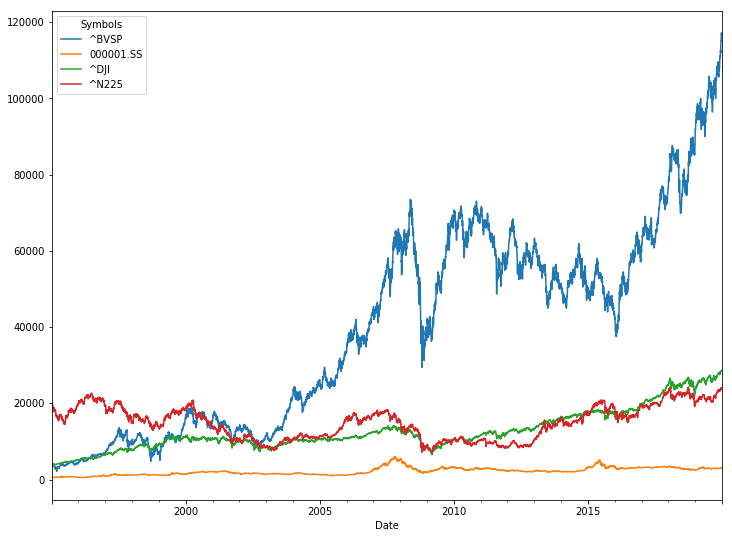

In [11]:
# first inpection: our variables have diffrente levels...
df.plot(figsize=(12,9))
dfo=df #saving the original DataFrame

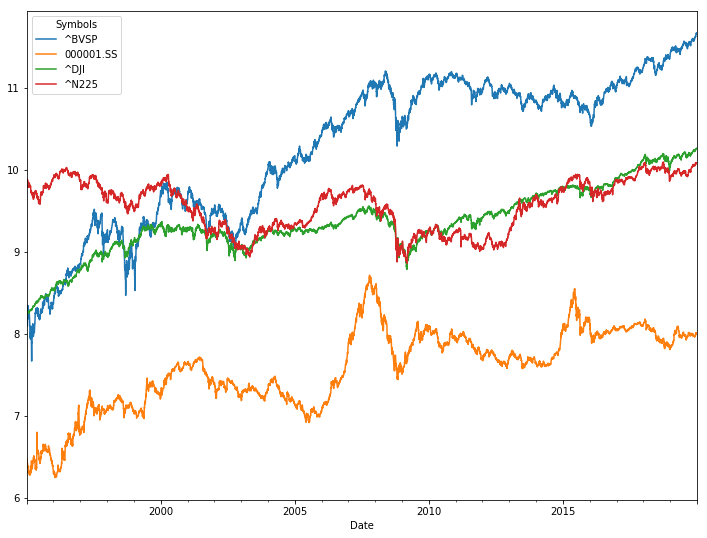

In [12]:
# graph of variables in log: let'us put in log.
# we just can see some comovements 
df =np.log(df)
df=df.dropna(how='any')
dfg=df
dfg.plot(figsize=(12,9))

In [13]:
df.head()

Symbols,^BVSP,000001.SS,^DJI,^N225
Date,,,,
1995-01-04,8.285992,6.482817,8.257813,9.887563
1995-01-05,8.303183,6.472176,8.256067,9.884106
1995-01-06,8.249941,6.462655,8.260340,9.879167
1995-01-09,8.196382,6.439350,8.258772,9.875341
1995-01-10,8.092545,6.413951,8.260167,9.878244


In [14]:
#Descriptive Satistics:
# financial data is very volatile 
df.describe()

Symbols,^BVSP,000001.SS,^DJI,^N225
count,6518.000000,6518.000000,6518.000000,6518.000000
mean,10.264659,7.573458,9.363720,9.567843
std,0.904391,0.488545,0.414141,0.303517
min,7.667766,6.246998,8.251163,8.861489
25%,9.479222,7.235472,9.142723,9.288698
50%,10.643280,7.636614,9.300648,9.636555
75%,10.998949,7.974508,9.646699,9.807872
max,11.671663,8.714741,10.262743,10.097022


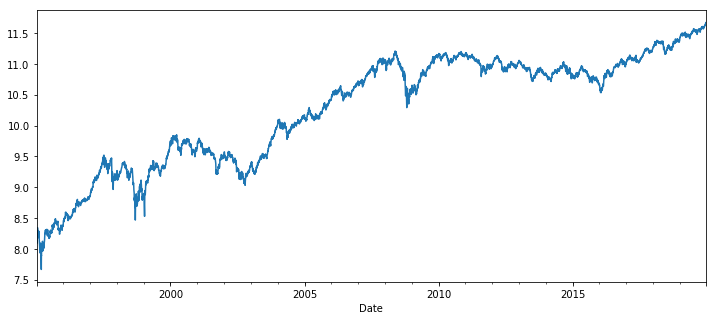

In [15]:
# let'us take a look closely into our target/dependent variable: Brazilian Sotck Exchange Index
# osciliation through time
df['^BVSP'].plot(figsize=(12,5))

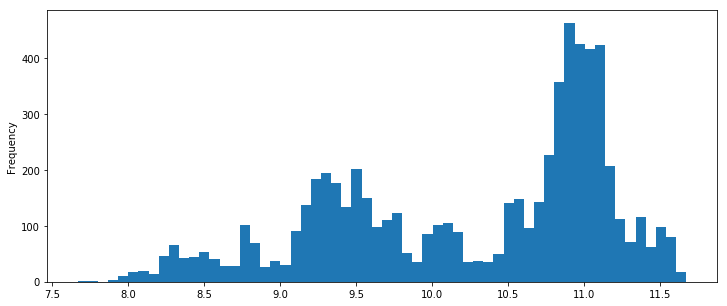

In [16]:
#our target variable histogram: it has 2 peaks of concetration (9.4 and 11), and different from a normal distribution
# This is very different when difference is taken (appendix)
df['^BVSP'].plot.hist(bins = 60,figsize=(12,5))

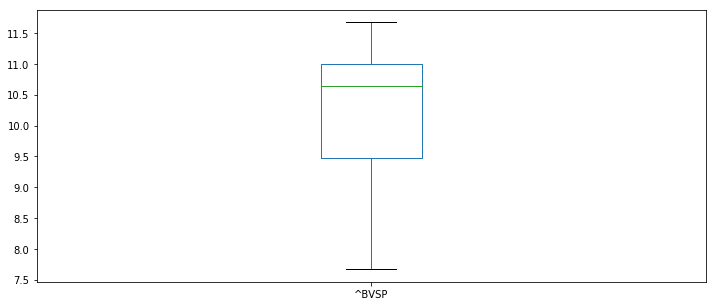

In [17]:
df['^BVSP'].plot.box(figsize=(12,5))

In [18]:
df.corr()

Symbols,^BVSP,000001.SS,^DJI,^N225
Symbols,,,,
^BVSP,1.000000,0.858031,0.833648,-0.031661
000001.SS,0.858031,1.000000,0.772831,-0.004564
^DJI,0.833648,0.772831,1.000000,0.301715
^N225,-0.031661,-0.004564,0.301715,1.000000


In [19]:
# Several combination were tested
batch_size = 180# 64, 32, 16, 8 
timesteps = 10
test_percent=.05 #.2, 0.1
print(len(df))

6518


In [20]:
## Scaling data 
dataset = df
values = dataset.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_features = df.shape[1]

In [21]:
## function in order to create our variables lags
###https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [22]:
##  MAPE: evaluation metric
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
reframed = series_to_supervised(scaled, timesteps,1)                                                          
reframed.shape

(6508, 44)

In [24]:
# getting the train and test dataset size for a Stateful Model (LSTM)

def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            #print(x)
    return (max(train_length_values))

length = get_train_length(reframed, batch_size, test_percent)
upper_train = length + timesteps*2
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            #print(x)
    return (max(test_length_values))


test_length = get_test_length(reframed, batch_size)


print(length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
print(testset_length)

6120
180


In [25]:
# split into train and test sets
values = reframed.values
## must starts from the end to the begin (though not all data from the begging will be used, due to batch_size)
train = values[len(reframed)-length-testset_length:-testset_length,:]
test = values[-testset_length:]

# split into input and outputs
n_obs = timesteps * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(6120, 40) 6120 (6120,)


In [26]:
import statsmodels.api as sm

trainyols=train_y 
testyols=test_y

train_Xols= sm.add_constant(train_X)
test_Xols=sm.add_constant(test_X)
modelos = sm.OLS(trainyols,train_Xols)


results = modelos.fit()
par=results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.747e+05
Date:                Sun, 29 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:19:55   Log-Likelihood:                 23957.
No. Observations:                6120   AIC:                        -4.783e+04
Df Residuals:                    6079   BIC:                        -4.756e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.166      0.030     5.4e-05       0.001
x1            -0.0116      0.015     -0.766      0.444      -0.041       0.018
x2            -0.0127      0.010     -1.314      0.189      -0.032       0.006
x3            -0.0210      0.014     -1.459      0.145      -0.049       0.007
x4            -0.0019      0.005     -0.340      0.734      -0.013       0.009
x5             0.0098      0.021      0.461      0.645      -0.032       0.051
x6             0.0115      0.014      0.837      0.403      -0.015       0.038
x7            -0.0085      0.019     -0.448      0.654      -0.046       0.029
x8             0.0155      0.008      1.993      0.046       0.000       0.031
x9             0.0163      0.021      0.770      0.442      -0.025       0.058
x10           -0.0193      0.014     -1.411      0.158      -0.046       0.008
x11            0.0231      0.019      1.207      0.227      -0.014       0.061
x12           -0.0110      0.008     -1.367      0.172      -0.027       0.005
x13            0.0251      0.021      1.181      0.238      -0.017       0.067
x14            0.0228      0.014      1.666      0.096      -0.004       0.050
x15           -0.0156      0.019     -0.817      0.414      -0.053       0.022
x16            0.0023      0.008      0.291      0.771      -0.013       0.018
x17           -0.0115      0.021     -0.543      0.587      -0.053       0.030
x18           -0.0026      0.014     -0.189      0.850      -0.029       0.024
x19            0.0016      0.019      0.084      0.933      -0.036       0.039
x20            0.0023      0.008      0.291      0.771      -0.013       0.018
x21            0.0066      0.021      0.311      0.756      -0.035       0.048
x22            0.0080      0.014      0.585      0.559      -0.019       0.035
x23           -0.0017      0.019     -0.089      0.929      -0.039       0.036
x24           -0.0171      0.008     -2.120      0.034      -0.033      -0.001
x25            0.0329      0.021      1.545      0.122      -0.009       0.075
x26            0.0101      0.014      0.737      0.461      -0.017       0.037
x27           -0.0226      0.019     -1.181      0.238      -0.060       0.015
x28            0.0030      0.008      0.373      0.709      -0.013       0.019
x29           -0.0606      0.021     -2.847      0.004      -0.102      -0.019
x30           -0.0138      0.014     -1.004      0.316      -0.041       0.013
x31            0.0703      0.019      3.680      0.000       0.033       0.108
x32            0.0119      0.008      1.480      0.139      -0.004       0.028
x33            0.0026      0.021      0.120      0.904      -0.039       0.044
x34           -0.0048      0.014     -0.349      0.727      -0.032       0.022
x35           -0.0541      0.019     -2.891      0.004      -0.091      -0.017
x3

In [27]:
yhattrainols=results.predict(train_Xols)
yhatols=results.predict(test_Xols)

In [28]:
mapetrainOls = mean_absolute_percentage_error(trainyols, yhattrainols)
mapetestOls = mean_absolute_percentage_error(testyols, yhatols) 


rmsetrainOls = sqrt(mean_squared_error(trainyols, yhattrainols))
rmsetestOls = sqrt(mean_squared_error(testyols, yhatols ))

print('\033[1m' +'MAPE Train:' + '\033[0m',"%.4f"%mapetrainOls)
print('\033[1m' +'MAPE Test:' + '\033[0m',"%.4f"%mapetestOls)
print('\033[1m' +'RMSE Train:' + '\033[0m',"%.4f"%rmsetrainOls)
print('\033[1m' +'RMSE Test:' + '\033[0m',"%.4f"%rmsetestOls)

MAPE Train: 0.6281
MAPE Test: 0.2055
RMSE Train: 0.0048
RMSE Test: 0.0025


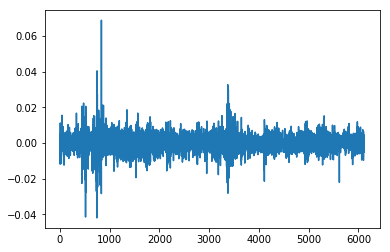

In [29]:
#residuals graph
# close to zero. Evidence that residuals are stationary (variables might cointegrate) and stable
r=results.resid
plt.plot(r)

In [30]:
## Augmented Dick-Fuller test in order to check if resids are stationary: evidence of cointegration
from statsmodels.tsa.stattools import adfuller

result = adfuller(r)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.342307
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


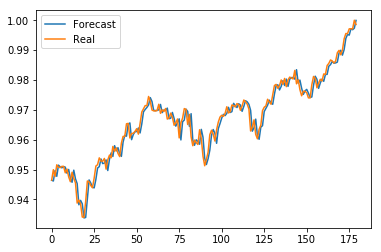

In [31]:
#graph: OLS Forecast and Real data
plt.plot(yhatols[-1000:],label='Forecast')
plt.plot(testyols[-1000:],label='Real')
plt.legend()
plt.show()

In [32]:
# invert scaling for forecast
test_Xd = test_Xols.reshape((test_Xols.shape[0], test_Xols.shape[1]))
yhatols=pd.DataFrame(yhatols)
inv_yhatols = np.concatenate((yhatols, test_Xd[:, -(len(df.columns)-1):]), axis=1)
inv_yhatols = scaler.inverse_transform(inv_yhatols)
inv_yhatols = inv_yhatols[:,0]
nyhatols1=pd.Series(np.exp(inv_yhatols))

In [33]:
print('Prediction call OLS for today',"%.2f"%nyhatols1.iloc[[-1]])

Prediction call OLS for today 117175.67


In [34]:
# Another Data prepartion
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], timesteps, n_features))
test_X = test_X.reshape((test_X.shape[0], timesteps, n_features))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [35]:
## Hyperparamters tests: remaining only the best combination
batch_size = 180#  64, 32, 16, 8 
epochs =600#[160,250,400,600,1000]
ltest_percent=.05
listan=[44]#[30,55,44,100] 
listafuncao=['linear']   #[linear''relu','elu']
listalraprend = [0.01]#,0.01]
listaotm = ['adam'] #['adam']
listadrop=[0.3] #[0.2,0.3,0.4]
listafuncaop=['mse'] #['mae','mse']
tam=len(listan)*len(listafuncao)*len(listalraprend)*len(listaotm)*len(listadrop)*len(listafuncaop)
print(tam)

1


In [36]:
#Modeling: for's in order to get results from hyperparameters combinations
resultadosn=[]
resultadosfuncaoact=[]
resultadoslraprend=[]
resultadosotm=[]
resultadosdrop=[]
resultadosfp=[]
resultadosmapetrain=[]
resultadosmapetest=[]
resultadosrmsetrain=[]
resultadosrmsetest=[]
dfresultados_ypredtrain= pd.DataFrame(np.zeros((length,tam)))
dfresultados_ypredtest= pd.DataFrame(np.zeros((testset_length,tam)))
i=0
for n1 in listan:
    for funcaoact in listafuncao:
        for lraprend in listalraprend:
            for otm in listaotm:
                for drop in listadrop:
                    for fp in listafuncaop:
                                np.random.seed(123)
                                
                                ## Scaling data for LSTM
                                dataset = df
                                values = dataset.values
                                values = values.astype('float32')
                                scaler = MinMaxScaler(feature_range=(0, 1))
                                scaled = scaler.fit_transform(values)
                                n_features = df.shape[1]
                                
                                
                                # getting the train and test dataset size
                                length = get_train_length(reframed, batch_size, test_percent)
                                upper_train = length + timesteps*2
                                test_length = get_test_length(reframed, batch_size)
                                upper_test = test_length + timesteps*2
                                testset_length = test_length - upper_train
                                # split into train and test sets
                                values = reframed.values
                                ## must starts from the end to the begin (though not all data from the begging will be used, due to batch_size)
                                train = values[len(reframed)-length-testset_length:-testset_length,:]
                                test = values[-testset_length:]
                                
                                # split into input and outputs
                                n_obs = timesteps * n_features
                                train_X, train_y = train[:, :n_obs], train[:, -n_features]
                                test_X, test_y = test[:, :n_obs], test[:, -n_features]
                                #print(train_X.shape, len(train_X), train_y.shape)
                                
                                # reshape input to be 3D [samples, timesteps, features]
                                train_X = train_X.reshape((train_X.shape[0], timesteps, n_features))
                                test_X = test_X.reshape((test_X.shape[0], timesteps, n_features))
                                
                                
                                ## Stateful 1 layer
                                model1 = Sequential()
                                model1.add(LSTM(n1, batch_input_shape=(batch_size,timesteps,train_X.shape[2]),stateful=True))
                                model1.add(Activation(funcaoact))
                                model1.add(Dropout(drop))
                                model1.add(Dense(1))
                                sgd = optimizers.SGD(lr=lraprend, momentum=0.9, nesterov=True)
                                adam = optimizers.adam(lr=lraprend)
                                rmsprop = optimizers.RMSprop(lr=lraprend)
                                model1.compile(loss = fp, optimizer = otm)
                                # fit network
                                history = model1.fit( train_X ,train_y ,validation_data = (test_X, test_y)
                                                         ,epochs = epochs 
                                                         ,batch_size = batch_size
                                                         ,verbose = 0
                                                         ,shuffle = False)# plot history
                                model1.reset_states()
                                
                                
                                #Predict
                                yhattrain1 = model1.predict(train_X,batch_size=batch_size,verbose=0)
                                yhat1 = model1.predict(test_X,batch_size=batch_size,verbose=0)
                                
                                
                                #Avaliacao
                                
                                mapetrain = mean_absolute_percentage_error(train_y[-4000:],yhattrain1[-4000:])
                                mapetest = mean_absolute_percentage_error(test_y, yhat1 )
                                rmsetrain = sqrt(mean_squared_error(train_y, yhattrain1))
                                rmsetest = sqrt(mean_squared_error(test_y, yhat1 ))
                                
 

                                #Guardando resultados
                                resultadosn.append(n1)
                                resultadosfuncaoact.append(funcaoact)
                                resultadoslraprend.append(lraprend)
                                resultadosotm.append(otm)
                                resultadosdrop.append(drop)
                                resultadosfp.append(fp)
                                resultadosmapetrain.append(mapetrain)
                                resultadosmapetest.append(mapetest)
                                resultadosrmsetrain.append(rmsetrain)
                                resultadosrmsetest.append(rmsetest)                    
                                dfresultados_ypredtrain.iloc[:,i]=yhattrain1
                                dfresultados_ypredtest.iloc[:,i]=yhat1
                                i+=1

                                print("%s, %s, %s, %s, %s,%s, %.2f, %.2f, %.2f, %.2f   " % (n1, funcaoact, otm, lraprend,drop,fp,mapetrain,mapetest,rmsetrain,rmsetest))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


44, linear, adam, 0.01, 0.3,mse, 12.74, 1.55, 0.01, 0.00   


In [37]:
#Keeping results and getting the lowest MAPE in test data set
dfresultados = pd.concat([pd.DataFrame(resultadosn,columns=['# of Neurons ']),pd.DataFrame(resultadosfuncaoact,columns=['Activation Function']),pd.DataFrame(resultadoslraprend,columns=['Learning Rate']),pd.DataFrame(resultadosotm,columns=['Otmzador']),pd.DataFrame(resultadosdrop,columns=['Drop']),pd.DataFrame(resultadosfp,columns=['Loss Function']),pd.DataFrame(resultadosmapetrain,columns=['MAPE Train']),pd.DataFrame(resultadosmapetest,columns=['MAPE Test']),pd.DataFrame(resultadosrmsetrain,columns=['RMSE Train']),pd.DataFrame(resultadosrmsetest,columns=['RMSE Test'])],axis=1)
index_melhorserie=dfresultados.index[dfresultados['MAPE Test']==dfresultados['MAPE Test'].min()].tolist()
print(index_melhorserie)

[0]


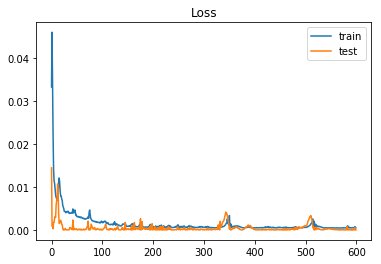

In [38]:
# plot loss during training

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [39]:
print(dfresultados.loc[index_melhorserie])
print('\033[1m' +'Best MAPE Train:' + '\033[0m',"%.4f"%dfresultados.loc[index_melhorserie, 'MAPE Train'])
print('\033[1m' +'Best MAPE Test:' + '\033[0m',"%.4f"%dfresultados.loc[index_melhorserie, 'MAPE Test'])
print('\033[1m' +'Best RMSE Train:' + '\033[0m',"%.4f"%dfresultados.loc[index_melhorserie, 'RMSE Train'])
print('\033[1m' +'Best RMSE Test:' + '\033[0m',"%.4f"%dfresultados.loc[index_melhorserie, 'RMSE Test'])

   # of Neurons  Activation Function  Learning Rate Otmzador  Drop  \
0             44              linear           0.01     adam   0.3   

  Loss Function  MAPE Train  MAPE Test  RMSE Train  RMSE Test  
0           mse   12.737662   1.552181    0.007065   0.004046  
Best MAPE Train: 12.7377
Best MAPE Test: 1.5522
Best RMSE Train: 0.0071
Best RMSE Test: 0.0040


In [40]:
# saveing the model 

import h5py
model1.save(filepath="lstm_stockindex_model.h5")
from keras.models import load_model
model1 = load_model(filepath="lstm_stockindex_model.h5")

yhattrain1 = model1.predict(train_X,batch_size=batch_size,verbose=0)
yhat1 = model1.predict(test_X,batch_size=batch_size,verbose=0)

In [41]:
# getting the best model predictions (when have several models from hyperparameters combinations)
index_melhorserie=dfresultados.index[dfresultados['MAPE Test']==dfresultados['MAPE Test'].min()].tolist()
yhattrain1=dfresultados_ypredtrain.iloc[:,index_melhorserie]
yhat1=dfresultados_ypredtest.iloc[:,index_melhorserie]

trainy= pd.Series(train_y)
testy=pd.Series(test_y)

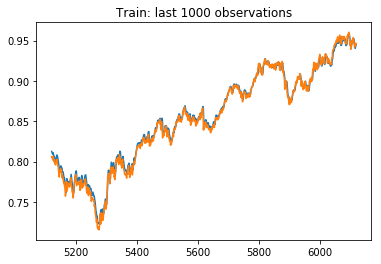

In [42]:
# trainning plot
plt.title('Train: last 1000 observations')
plt.plot(yhattrain1[-1000:])
plt.plot(trainy[-1000:])

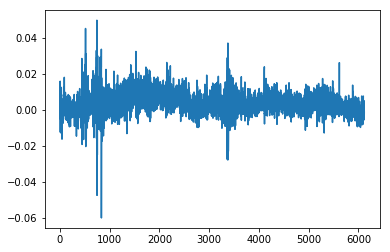

In [43]:
## Residuals graph
res=(yhattrain1[0]-trainy)
plt.plot(res)

In [44]:
## Augmented Dick-Fuller test in order to check if resids are stationary
result = adfuller(res)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.260902
p-value: 0.000007
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


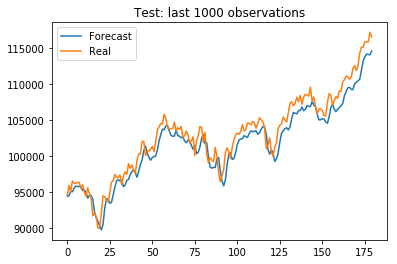

In [45]:
### Invert Scaling for test dataset
test_X1 = test_X.reshape((test_X.shape[0], timesteps*n_features))
# invert scaling for forecast
inv_yhat1 = np.concatenate((yhat1, test_X1[:, -(len(df.columns)-1):]), axis=1)
inv_yhat1 = scaler.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]
nyhat1=np.exp(inv_yhat1)

# invert scaling for actual
test_y1 = test_y.reshape((len(test_y), 1))
inv_y1 = np.concatenate((test_y1, test_X1[:, -(len(df.columns)-1):]), axis=1)
inv_y1 = scaler.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]
nytest1=np.exp(inv_y1)

#test plot
plt.title('Test: last 1000 observations')
plt.plot(nyhat1[-1000:],label='Forecast')
plt.plot(nytest1[-1000:],label='Real')
plt.legend()
plt.show()

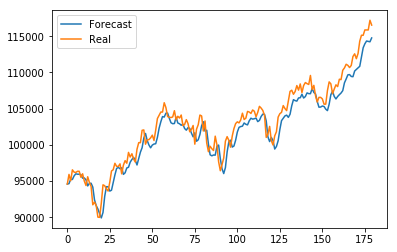

In [46]:
## Appropriate level: oscillations are similar, but level is not
de=pd.Series(nyhat1)- pd.Series(nyhat1).shift(1)
x=(nytest1[0])
x_diff=de.iloc[1:,]
d=pd.Series(np.r_[x, x_diff].cumsum())

plt.plot(d[-1000:],label='Forecast')
plt.plot(nytest1[-1000:],label='Real')
plt.legend()
plt.show()

In [47]:
print('Prediction call for today',"%.2f"%d.iloc[-1:])

Prediction call for today 114758.99


In [48]:
## Boundaries from RSME
band=(sum((nytest1-d)**2)**0.5)/len(nytest1)
band
print('Prediction - 2.5 deviation',"%.2f"%(d.iloc[-1:]-2.5*band))
print('Prediction + 2.5 deviation',"%.2f"%(dfo.iloc[-1,0:1]+2.5*band))
b1=d+2.5*band
b2=d-2.5*band

Prediction - 2.5 deviation 114468.54
Prediction + 2.5 deviation 116824.45


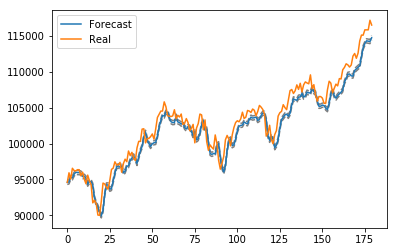

In [49]:
plt.plot(b1,linestyle='--',color='grey')
plt.plot(b2,linestyle='--',color='grey')
plt.plot(d[-1000:],label='Forecast')
plt.plot(nytest1[-1000:],label='Real')
plt.legend()
plt.show()

In [50]:
## LSTM RMSE
devlstm=(sum((nytest1-d)**2)**0.5)/len(nytest1)
devlstm

116.18030451493428

In [51]:
## OLS RMSE
devlols=(sum((pd.Series(nytest1)-nyhatols1)**2)**0.5)/len(nytest1)
devlols

76.84747062129507

In [52]:
print('Prediction OLS call  for today',"%.2f"%nyhatols1.iloc[[-1]])
print('Prediction LSTM call for today',"%.2f"%d.iloc[-1:])
print('Actual-Online',"%.2f"%dfo.iloc[-1,0:1])

Prediction OLS call  for today 117175.67
Prediction LSTM call for today 114758.99
Actual-Online 116534.00


In [53]:
# Taking the difference (log difference)
df=df -df.shift(1)
df=df.dropna(how='any')
df.head()

Symbols,^BVSP,000001.SS,^DJI,^N225
Date,,,,
1995-01-05,0.017191,-0.010640,-0.001746,-0.003457
1995-01-06,-0.053242,-0.009521,0.004273,-0.004939
1995-01-09,-0.053559,-0.023305,-0.001568,-0.003826
1995-01-10,-0.103836,-0.025400,0.001395,0.002903
1995-01-11,0.067716,0.004626,-0.001219,0.002408


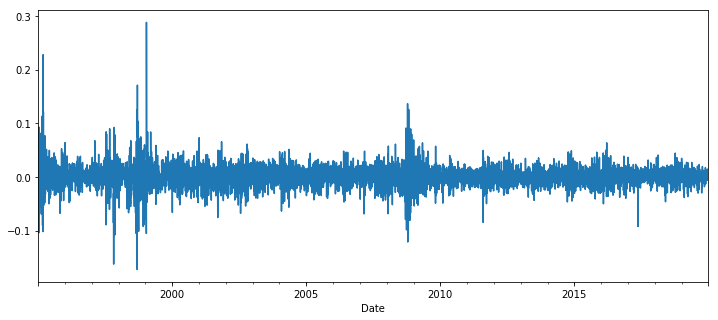

In [54]:
# let'us take a look closely into our target/dependent variable: Brazilian Sotck Exchange Index in difference
# oscillation through time is around zero (Market efficiency theory: arbitrage opportunities tend to zero )
df['^BVSP'].plot(figsize=(12,5))

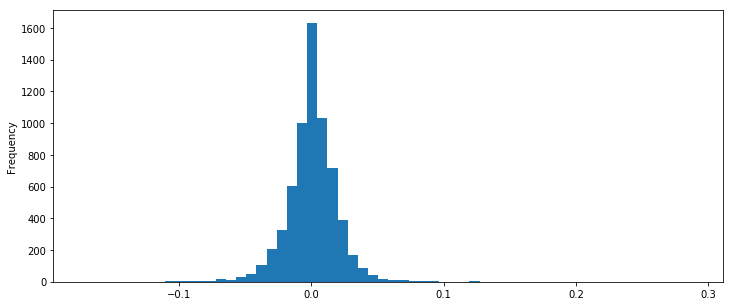

In [55]:
#our target variable histogram: much of the data is around zero, as expected (Market efficiency theory)
df['^BVSP'].plot.hist(bins = 60,figsize=(12,5))

In [56]:

# defining the batch size and number of epochs
batch_size = 180# 64, 32, 16, 8 
timesteps = 10
test_percent=.05 #.2, 0.1
print(len(df))

6517


In [57]:

## Scaling data for LSTM
dataset = df
values = dataset.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_features = df.shape[1]

reframed = series_to_supervised(scaled, timesteps,1)                                                          
reframed.shape
length = get_train_length(reframed, batch_size, test_percent)
upper_train = length + timesteps*2
test_length = get_test_length(reframed, batch_size)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train

# split into train and test sets
values = reframed.values
## must starts from the end to the begin (though not all data from the begging will be used, due to batch_size)
train = values[len(reframed)-length-testset_length:-testset_length,:]
test = values[-testset_length:]

# split into input and outputs
n_obs = timesteps * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
#print(train_X.shape, len(train_X), train_y.shape)

In [58]:
import statsmodels.api as sm

trainyols=train_y 
testyols=test_y

train_Xols= sm.add_constant(train_X)
test_Xols=sm.add_constant(test_X)
modelos = sm.OLS(trainyols,train_Xols)


results = modelos.fit()
par=results.params
#results.summary()

In [59]:
yhattrainols=results.predict(train_Xols)
yhatols=results.predict(test_Xols)
mapetrainOls = mean_absolute_percentage_error(trainyols[-4000], yhattrainols[-4000])
mapetestOls = mean_absolute_percentage_error(testyols, yhatols) 


rmsetrainOls = sqrt(mean_squared_error(trainyols, yhattrainols))
rmsetestOls = sqrt(mean_squared_error(testyols, yhatols ))

print('\033[1m' +'MAPE Train:' + '\033[0m',"%.4f"%mapetrainOls)
print('\033[1m' +'MAPE Test:' + '\033[0m',"%.4f"%mapetestOls)
print('\033[1m' +'RMSE Train:' + '\033[0m',"%.4f"%rmsetrainOls)
print('\033[1m' +'RMSE Test:' + '\033[0m',"%.4f"%rmsetestOls)

MAPE Train: 6.7102
MAPE Test: 4.6256
RMSE Train: 0.0419
RMSE Test: 0.0221


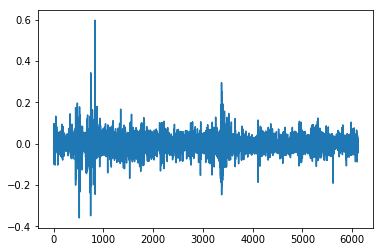

In [60]:
r=results.resid
plt.plot(r)

In [61]:

## Augmented Dick-Fuller test in order to check if resids are statonary: evidence of cointegration
from statsmodels.tsa.stattools import adfuller

result = adfuller(r)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -78.316941
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


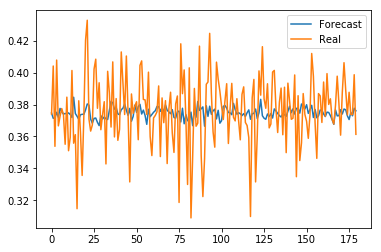

In [62]:
plt.plot(yhatols[-1000:],label='Forecast')
plt.plot(testyols[-1000:],label='Real')
plt.legend()
plt.show()

In [63]:
# invert scaling for forecast
test_Xd = test_Xols.reshape((test_Xols.shape[0], test_Xols.shape[1]))
yhatols=pd.DataFrame(yhatols)
inv_yhatols = np.concatenate((yhatols, test_Xd[:, -(len(df.columns)-1):]), axis=1)
inv_yhatols = scaler.inverse_transform(inv_yhatols)
inv_yhatols = inv_yhatols[:,0]
nyhatols=pd.Series(np.exp(inv_yhatols))

In [64]:
train_X = train_X.reshape((train_X.shape[0], timesteps, n_features))
test_X = test_X.reshape((test_X.shape[0], timesteps, n_features))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [65]:
## Hyperparamters tests: remained only the best combination
batch_size = 180# 64,90,16
epochs =400 #[160,250,400,600,1000]
timesteps = 10 #[30,20,10,5]
ltest_percent=.05 #[.2,.15,.5]
listan=[44]#[30,44,55,44,100] 
listafuncao=['linear']   #[linear''relu','elu']
listalraprend = [0.01]#[0.01,0.001]
listaotm = ['adam'] #['adam']
listadrop=[0.3] #[0.2,0.3,0.4]
listafuncaop=['mse'] #['mae','mse']
tam=len(listan)*len(listafuncao)*len(listalraprend)*len(listaotm)*len(listadrop)*len(listafuncaop)
print(tam)

1


In [66]:
#Modeling
resultadosn=[]
resultadosfuncaoact=[]
resultadoslraprend=[]
resultadosotm=[]
resultadosdrop=[]
resultadosfp=[]
resultadosmapetrain=[]
resultadosmapetest=[]
resultadosrmsetrain=[]
resultadosrmsetest=[]
dfresultados_ypredtrain= pd.DataFrame(np.zeros((length,tam)))
dfresultados_ypredtest= pd.DataFrame(np.zeros((testset_length,tam)))
i=0
for n1 in listan:
    for funcaoact in listafuncao:
        for lraprend in listalraprend:
            for otm in listaotm:
                for drop in listadrop:
                    for fp in listafuncaop:
                                np.random.seed(123)
                                
                                ## Scaling data for LSTM
                                dataset = df
                                values = dataset.values
                                values = values.astype('float32')
                                scaler = MinMaxScaler(feature_range=(0, 1))
                                scaled = scaler.fit_transform(values)
                                n_features = df.shape[1]
                                
                                
                                # getting the train and test dataset size
                                length = get_train_length(reframed, batch_size, test_percent)
                                upper_train = length + timesteps*2
                                test_length = get_test_length(reframed, batch_size)
                                upper_test = test_length + timesteps*2
                                testset_length = test_length - upper_train
                                # split into train and test sets
                                values = reframed.values
                                ## must starts from the end to the begin (though not all data from the begging will be used, due to batch_size)
                                train = values[len(reframed)-length-testset_length:-testset_length,:]
                                test = values[-testset_length:]
                                
                                # split into input and outputs
                                n_obs = timesteps * n_features
                                train_X, train_y = train[:, :n_obs], train[:, -n_features]
                                test_X, test_y = test[:, :n_obs], test[:, -n_features]
                                #print(train_X.shape, len(train_X), train_y.shape)
                                
                                # reshape input to be 3D [samples, timesteps, features]
                                train_X = train_X.reshape((train_X.shape[0], timesteps, n_features))
                                test_X = test_X.reshape((test_X.shape[0], timesteps, n_features))
                                
                                
                                ## Stateful 1 layer
                                model1 = Sequential()
                                model1.add(LSTM(n1, batch_input_shape=(batch_size,timesteps,train_X.shape[2]),stateful=True))
                                model1.add(Activation(funcaoact))
                                model1.add(Dropout(drop))
                                model1.add(Dense(1))
                                sgd = optimizers.SGD(lr=lraprend, momentum=0.9, nesterov=True)
                                adam = optimizers.adam(lr=lraprend)
                                rmsprop = optimizers.RMSprop(lr=lraprend)
                                model1.compile(loss = fp, optimizer = otm)
                                # fit network
                                history = model1.fit( train_X ,train_y ,validation_data = (test_X, test_y)
                                                         ,epochs = epochs 
                                                         ,batch_size = batch_size
                                                         ,verbose = 0
                                                         ,shuffle = False)# plot history
                                model1.reset_states()
                                
                                
                                #Predict
                                yhattrain1 = model1.predict(train_X,batch_size=batch_size,verbose=0)
                                yhat1 = model1.predict(test_X,batch_size=batch_size,verbose=0)
                                
                                
                                #Avaliacao
                                
                                mapetrain = mean_absolute_percentage_error(train_y[-4000:],yhattrain1[-4000:])
                                mapetest = mean_absolute_percentage_error(test_y, yhat1 )
                                rmsetrain = sqrt(mean_squared_error(train_y, yhattrain1))
                                rmsetest = sqrt(mean_squared_error(test_y, yhat1 ))
                                
 

                                #Guardando resultados
                                resultadosn.append(n1)
                                resultadosfuncaoact.append(funcaoact)
                                resultadoslraprend.append(lraprend)
                                resultadosotm.append(otm)
                                resultadosdrop.append(drop)
                                resultadosfp.append(fp)
                                resultadosmapetrain.append(mapetrain)
                                resultadosmapetest.append(mapetest)
                                resultadosrmsetrain.append(rmsetrain)
                                resultadosrmsetest.append(rmsetest)                    
                                dfresultados_ypredtrain.iloc[:,i]=yhattrain1
                                dfresultados_ypredtest.iloc[:,i]=yhat1
                                i+=1

                                print("%s, %s, %s, %s, %s,%s, %.2f, %.2f, %.2f, %.2f   " % (n1, funcaoact, otm, lraprend,drop,fp,mapetrain,mapetest,rmsetrain,rmsetest))

44, linear, adam, 0.01, 0.3,mse, 7.13, 4.62, 0.04, 0.02   


In [67]:
#keeping results
dfresultados = pd.concat([pd.DataFrame(resultadosn,columns=['# of Neurons ']),pd.DataFrame(resultadosfuncaoact,columns=['Activation Function']),pd.DataFrame(resultadoslraprend,columns=['Learning Rate']),pd.DataFrame(resultadosotm,columns=['Otmzador']),pd.DataFrame(resultadosdrop,columns=['Drop']),pd.DataFrame(resultadosfp,columns=['Loss Function']),pd.DataFrame(resultadosmapetrain,columns=['MAPE Train']),pd.DataFrame(resultadosmapetest,columns=['MAPE Test']),pd.DataFrame(resultadosrmsetrain,columns=['RMSE Train']),pd.DataFrame(resultadosrmsetest,columns=['RMSE Test'])],axis=1)
index_melhorserie=dfresultados.index[dfresultados['MAPE Test']==dfresultados['MAPE Test'].min()].tolist()
print(index_melhorserie)

[0]


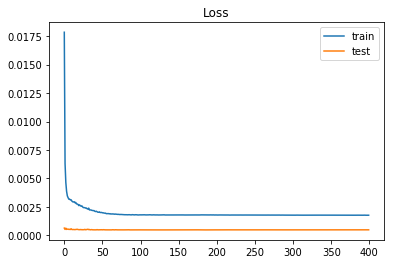

In [68]:
# plot loss function during training

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [69]:

print(dfresultados.loc[index_melhorserie])
print('\033[1m' +'Best MAPE Train:' + '\033[0m',"%.4f"%dfresultados.loc[index_melhorserie, 'MAPE Train'])
print('\033[1m' +'Best MAPE Test:' + '\033[0m',"%.4f"%dfresultados.loc[index_melhorserie, 'MAPE Test'])
print('\033[1m' +'Best RMSE Train:' + '\033[0m',"%.4f"%dfresultados.loc[index_melhorserie, 'RMSE Train'])
print('\033[1m' +'Best RMSE Test:' + '\033[0m',"%.4f"%dfresultados.loc[index_melhorserie, 'RMSE Test'])

   # of Neurons  Activation Function  Learning Rate Otmzador  Drop  \
0             44              linear           0.01     adam   0.3   

  Loss Function  MAPE Train  MAPE Test  RMSE Train  RMSE Test  
0           mse     7.13253    4.61591    0.041993   0.022136  
Best MAPE Train: 7.1325
Best MAPE Test: 4.6159
Best RMSE Train: 0.0420
Best RMSE Test: 0.0221


In [70]:
# saving the model 

import h5py
model1.save(filepath="lstmDif_stockindex_model.h5")
from keras.models import load_model
model1 = load_model(filepath="lstmDif_stockindex_model.h5")

yhattrain1 = model1.predict(train_X,batch_size=batch_size,verbose=0)
yhat1 = model1.predict(test_X,batch_size=batch_size,verbose=0)

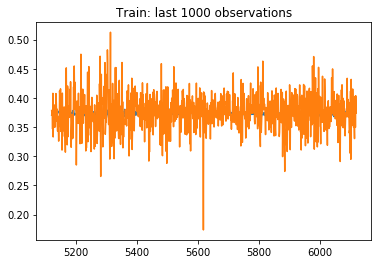

In [71]:
# getting the best model predictions
index_melhorserie=dfresultados.index[dfresultados['MAPE Test']==dfresultados['MAPE Test'].min()].tolist()
yhattrain1=dfresultados_ypredtrain.iloc[:,index_melhorserie]
yhat1=dfresultados_ypredtest.iloc[:,index_melhorserie]

trainy= pd.Series(train_y)
testy=pd.Series(test_y)

plt.title('Train: last 1000 observations')
plt.plot(yhattrain1[-1000:])
plt.plot(trainy[-1000:])

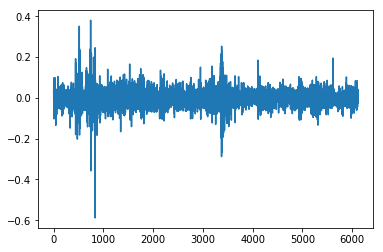

In [72]:
# Resids graph
res=(yhattrain1[0]-trainy)
plt.plot(res)

In [73]:
result = adfuller(res)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.991887
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


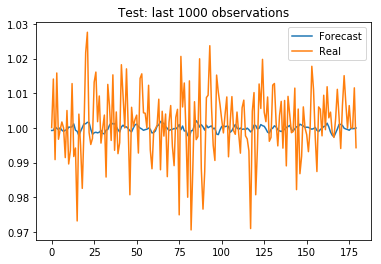

In [74]:
### Invert Scaling for test dataset
test_X1 = test_X.reshape((test_X.shape[0], timesteps*n_features))
# invert scaling for forecast
inv_yhat1 = np.concatenate((yhat1, test_X1[:, -(len(df.columns)-1):]), axis=1)
inv_yhat1 = scaler.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]

nyhat1=np.exp(inv_yhat1)

# invert scaling for actual
test_y1 = test_y.reshape((len(test_y), 1))
inv_y1 = np.concatenate((test_y1, test_X1[:, -(len(df.columns)-1):]), axis=1)
inv_y1 = scaler.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]
nytest1=np.exp(inv_y1)

#test plot
plt.title('Test: last 1000 observations')
plt.plot(nyhat1[-1000:],label='Forecast')
plt.plot(nytest1[-1000:],label='Real')
plt.legend()
plt.show()

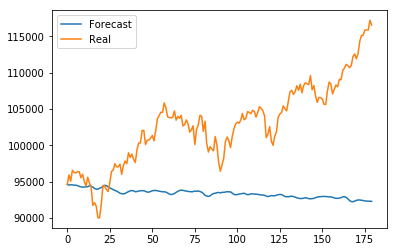

In [75]:
# invert to level LSTM
x=np.log(dfo.iloc[-len(inv_yhat1),0])
x_diff=pd.Series(inv_yhat1).iloc[1:,]
d=pd.Series(np.exp(pd.Series(np.r_[x, x_diff].cumsum())))
d
testsety=dfo.iloc[-len(inv_yhat1):,0]
testsety=testsety.reset_index(drop=True)
plt.plot(d,label='Forecast')
plt.plot(testsety,label='Real')
plt.legend()
plt.show()

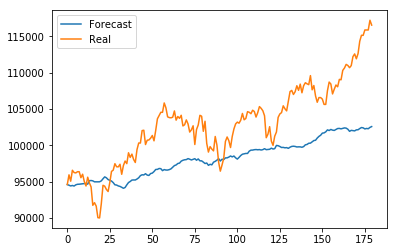

In [76]:
# invert to level OLS
x=np.log(dfo.iloc[-len(nyhatols),0])
x_diff=pd.Series(inv_yhatols).iloc[1:,]
dols=pd.Series(np.exp(pd.Series(np.r_[x, x_diff].cumsum())))
dols
testsety=dfo.iloc[-len(inv_yhat1):,0]
testsety=testsety.reset_index(drop=True)
plt.plot(dols,label='Forecast')
plt.plot(testsety,label='Real')
plt.legend()
plt.show()

In [77]:
# Mean Square Resids for LSTM
devlstm=(sum((testsety-d)**2)**0.5)/len(testsety)
devlstm

841.4561326682363

In [78]:
# Mean Square Resids for OLS
devlols=(sum((testsety-dols)**2)**0.5)/len(testsety)
devlols

437.3045809386037

In [79]:
print('Prediction LSTM in diff call for today',"%.2f"%d.iloc[-1:])
print('Prediction OLS in diff call for today',"%.2f"%dols.iloc[-1:])
print('Actual-Online',"%.2f"%dfo.iloc[-1,0:1])

Prediction LSTM in diff call for today 92270.77
Prediction OLS in diff call for today 102563.97
Actual-Online 116534.00
